# Data Processing with Data-Juicer's Filter Operators Using Natural Language

This notebook demonstrates how to use [AgentScope](https://github.com/modelscope/agentscope) for data processing through the Data-Juicer API Service. By leveraging natural language commands, users can execute data operations effortlessly, transforming complex tasks into simple instructions.

## Background

Data-Juicer is a powerful tool for data processing. However, effectively utilizing it requires a solid understanding of the parameters for each operator, which can limit accessibility. To mitigate this, we developed a user-friendly interface with [AgentScope](https://github.com/modelscope/agentscope) that allows users to perform data processing tasks via natural language commands, enhancing usability.

## Prerequisites

Before proceeding, ensure you have the following:

1. **Install AgentScope**:

   Execute the following command:

   ```bash
   pip install agentscope@git+https://github.com/modelscope/agentscope.git
   ```
   
   For configuration details, refer to [AgentScope](https://github.com/modelscope/agentscope) and review the `model_configs.json` file.

2. **Start the Data-Juicer API Service**:

   Launch the service using:
   
   ```bash
   uvicorn service:app
   ```

3. **Familiarize with Service Functions**:

   Explore the `ServiceToolkit` module and the `ReAct` agent; comprehensive examples are available in [conversation_with_react_agent](https://github.com/modelscope/agentscope/blob/main/examples/conversation_with_react_agent/main.ipynb).

## Step 1: Initializing AgentScope

In [1]:
import agentscope

agentscope.init(
    model_configs="./configs/model_configs.json",
    project="Data Processing Conversation"
)

2024-09-25 05:42:36.194 | INFO     | agentscope.manager._model:load_model_configs:115 - Load configs for model wrapper: gpt-3.5-turbo, gpt-4, gpt-4o, dashscope_chat-qwen-max


[]

## Step 2: Configuring Data-Juicer Tools

The `wrapped_filters.py` includes pre-defined functions that users can extend to support additional operators.

In [ ]:
from utils import setup_service_toolkit

service_toolkit = setup_service_toolkit('wrapped_filters')

## Step 3: Creating the ReAct Agent

In [3]:
from agentscope.agents import ReActAgent

def create_agent():
    agent = ReActAgent(
        name="assistant",
        model_config_name='dashscope_chat-qwen-max',
        # model_config_name='gpt-4',  # Uncomment to switch to GPT-4
        service_toolkit=service_toolkit,
        sys_prompt="""You are an assistant that executes natural language instructions to filter data. Please choose a relevant function to execute.""",
        verbose=False  # Set to True to display reasoning trace
    )
    return agent

## Step 4: Interacting with ReAct Agent using natural language

Now let's see how the agent responses to our instructions:

2024-09-25 05:42:56.565 | SAVE_LOG | agentscope.logging:_save_msg:96 - user: Filter out samples with text that is too short in dataset demos/data/demo-dataset.jsonl.
2024-09-25 05:42:56.566 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "e6f11a1cf34145b2969e40c09f4f1bfb", "metadata": null, "url": null, "timestamp": "2024-09-25 05:42:56", "name": "user", "content": "Filter out samples with text that is too short in dataset demos/data/demo-dataset.jsonl.", "role": "user"}
2024-09-25 05:42:56.567 | INFO     | agentscope.models.model:__init__:203 - Initialize model by configuration [dashscope_chat-qwen-max]


user: Filter out samples with text that is too short in dataset demos/data/demo-dataset.jsonl.


2024-09-25 05:43:05.445 | SAVE_LOG | agentscope.logging:_save_msg:96 - system: Analyzing data...
2024-09-25 05:43:05.446 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "2601f715c549469fabbf86e795d53388", "metadata": null, "url": null, "timestamp": "2024-09-25 05:43:05", "name": "system", "content": "Analyzing data...", "role": "system"}


system: Analyzing data...


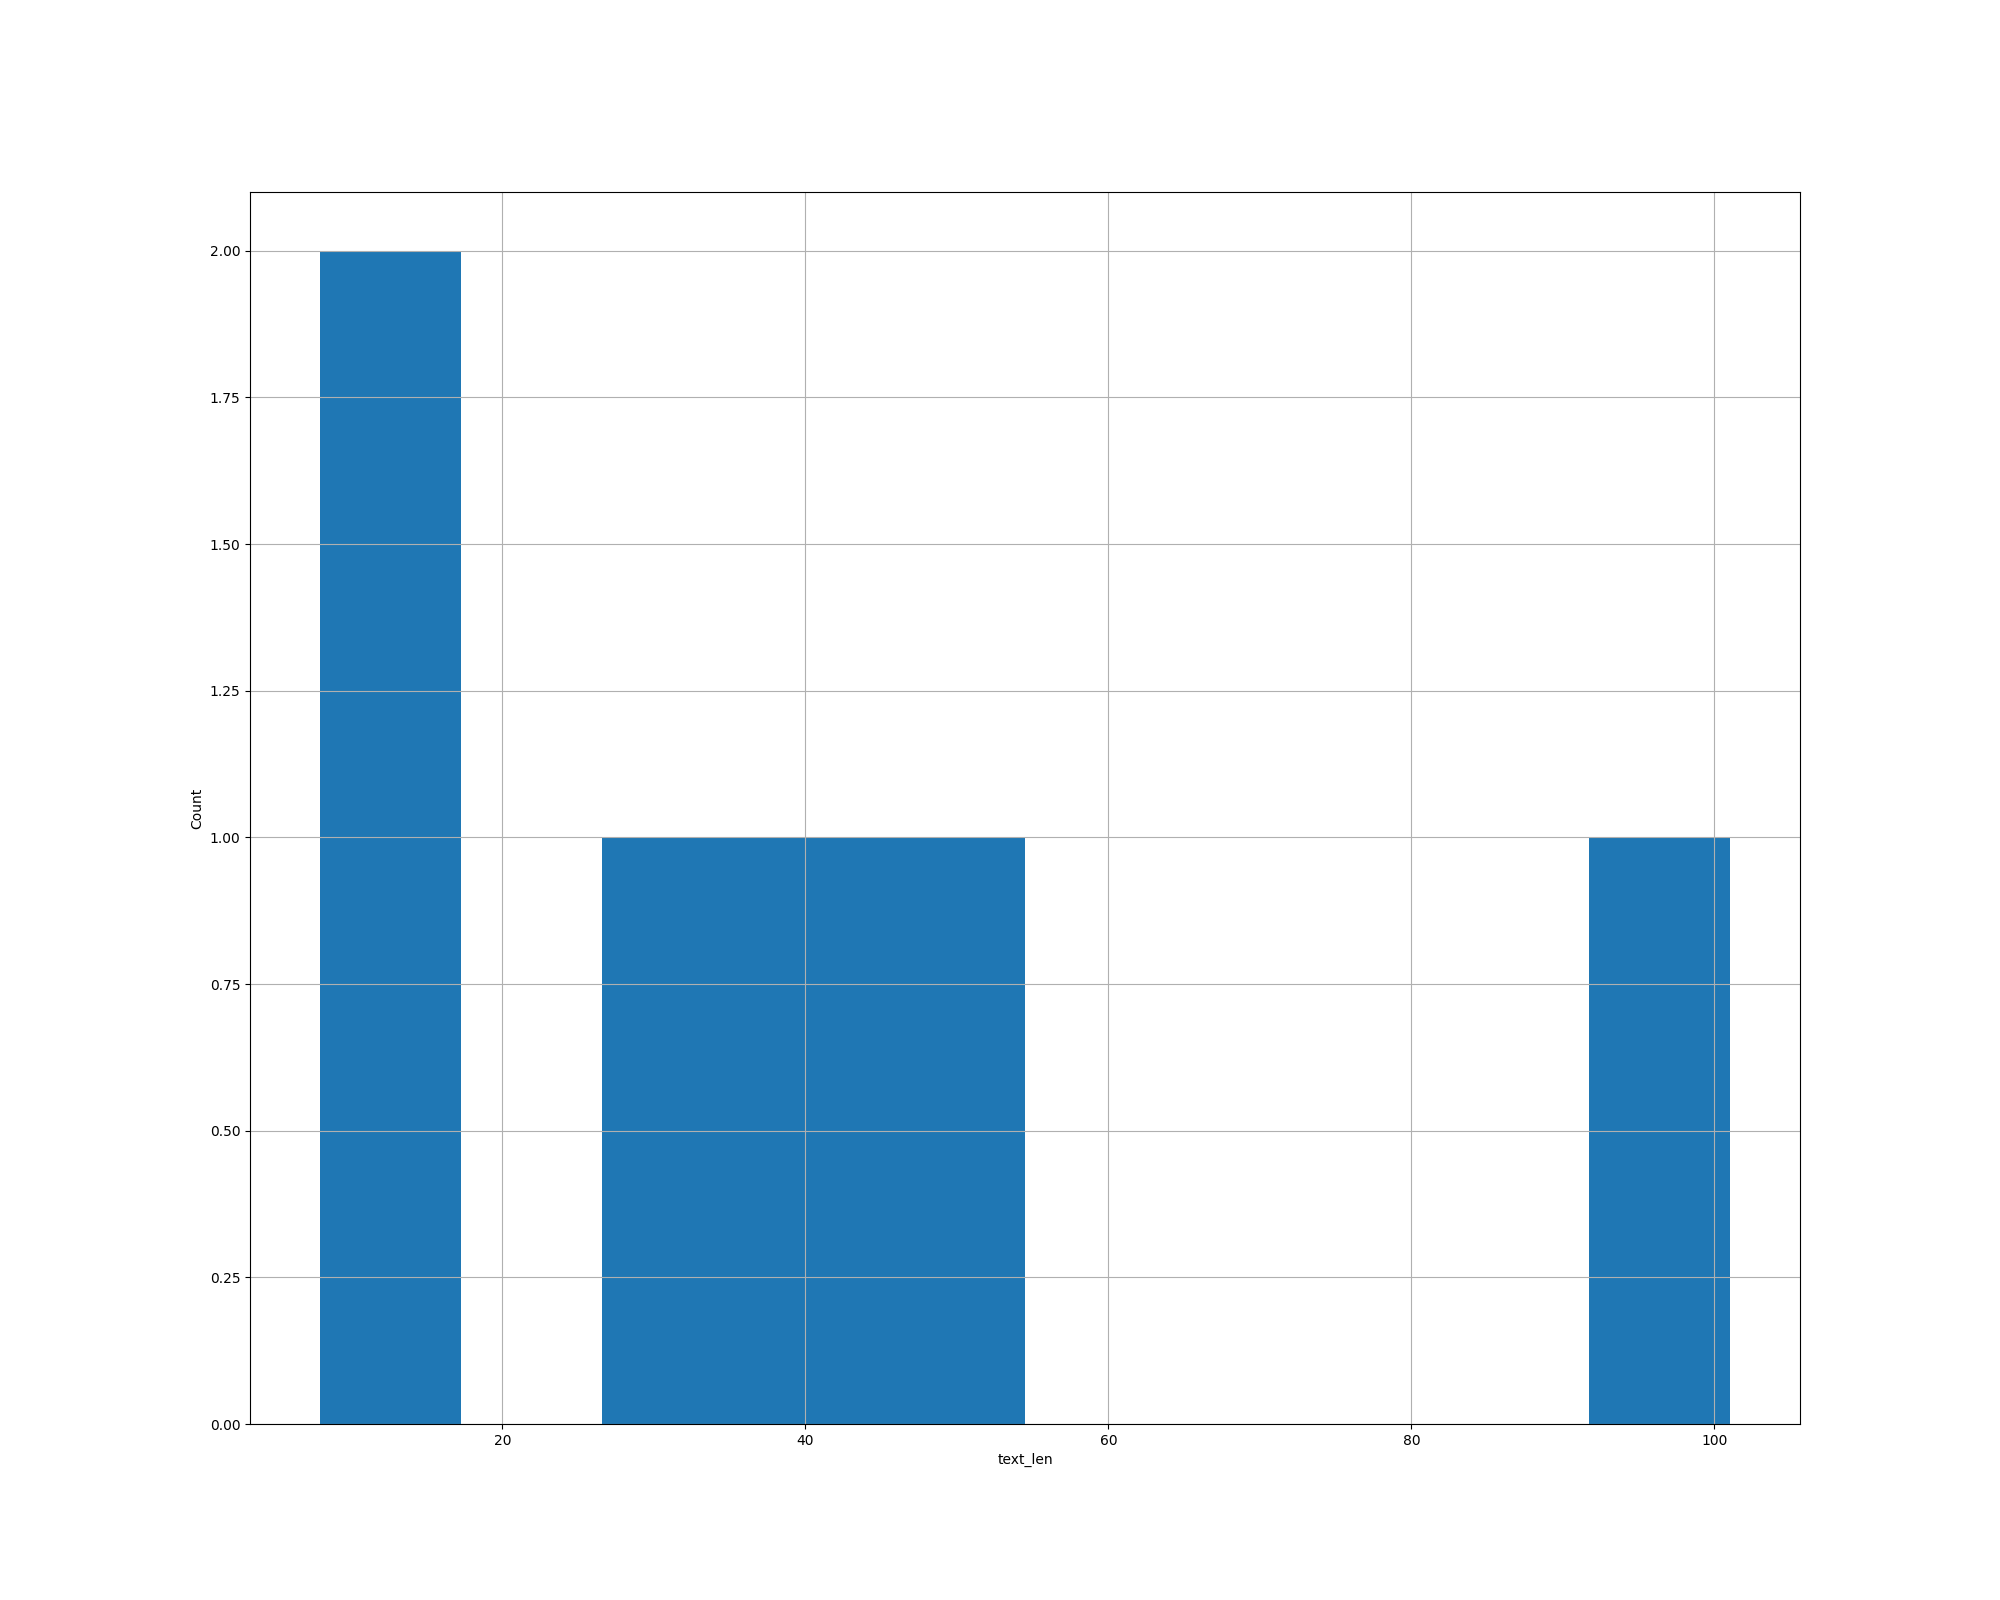

2024-09-25 05:43:13.942 | SAVE_LOG | agentscope.logging:_save_msg:96 - system: Processing data...
2024-09-25 05:43:13.942 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "5d6bd8cd39434887aed1c70fa17681e6", "metadata": null, "url": null, "timestamp": "2024-09-25 05:43:13", "name": "system", "content": "Processing data...", "role": "system"}


system: Processing data...


2024-09-25 05:43:24.077 | SAVE_LOG | agentscope.logging:_save_msg:96 - assistant: The samples with text that is too short have been filtered out. You can find the filtered dataset at this path: /root/Codes/data-juicer/outputs/20240925_054310/processed_data.jsonl.
2024-09-25 05:43:24.078 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "ecec5bf16adc4ad4ab36083c764edadb", "metadata": null, "url": null, "timestamp": "2024-09-25 05:43:24", "name": "assistant", "content": "The samples with text that is too short have been filtered out. You can find the filtered dataset at this path: /root/Codes/data-juicer/outputs/20240925_054310/processed_data.jsonl.", "role": "assistant"}


assistant: The samples with text that is too short have been filtered out. You can find the filtered dataset at this path: /root/Codes/data-juicer/outputs/20240925_054310/processed_data.jsonl.


In [4]:
from agentscope.message import Msg
from loguru import logger

dataset_path = 'demos/data/demo-dataset.jsonl'
msg = Msg(
    name="user",
    content=f"Filter out samples with text that is too short in dataset {dataset_path}.",
    role="user"
)
logger.chat(msg)

agent = create_agent()
response = agent(msg)

2024-09-25 05:43:26.182 | SAVE_LOG | agentscope.logging:_save_msg:96 - user: Calculate the ratio of alphabetic and numeric characters in the dataset. The dataset path: demos/data/demo-dataset.jsonl
2024-09-25 05:43:26.183 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "b741d4619ff94a9abf1a658df696c3e1", "metadata": null, "url": null, "timestamp": "2024-09-25 05:43:26", "name": "user", "content": "Calculate the ratio of alphabetic and numeric characters in the dataset. The dataset path: demos/data/demo-dataset.jsonl", "role": "user"}
2024-09-25 05:43:26.184 | INFO     | agentscope.models.model:__init__:203 - Initialize model by configuration [dashscope_chat-qwen-max]
2024-09-25 05:43:26.185 | WARNING  | agentscope.service.service_toolkit:add:213 - Service function `finish` already exists, skip adding it.


user: Calculate the ratio of alphabetic and numeric characters in the dataset. The dataset path: demos/data/demo-dataset.jsonl


2024-09-25 05:43:35.445 | SAVE_LOG | agentscope.logging:_save_msg:96 - system: Analyzing data...
2024-09-25 05:43:35.445 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "c266dd4b4959462180727b55d2632eb5", "metadata": null, "url": null, "timestamp": "2024-09-25 05:43:35", "name": "system", "content": "Analyzing data...", "role": "system"}


system: Analyzing data...


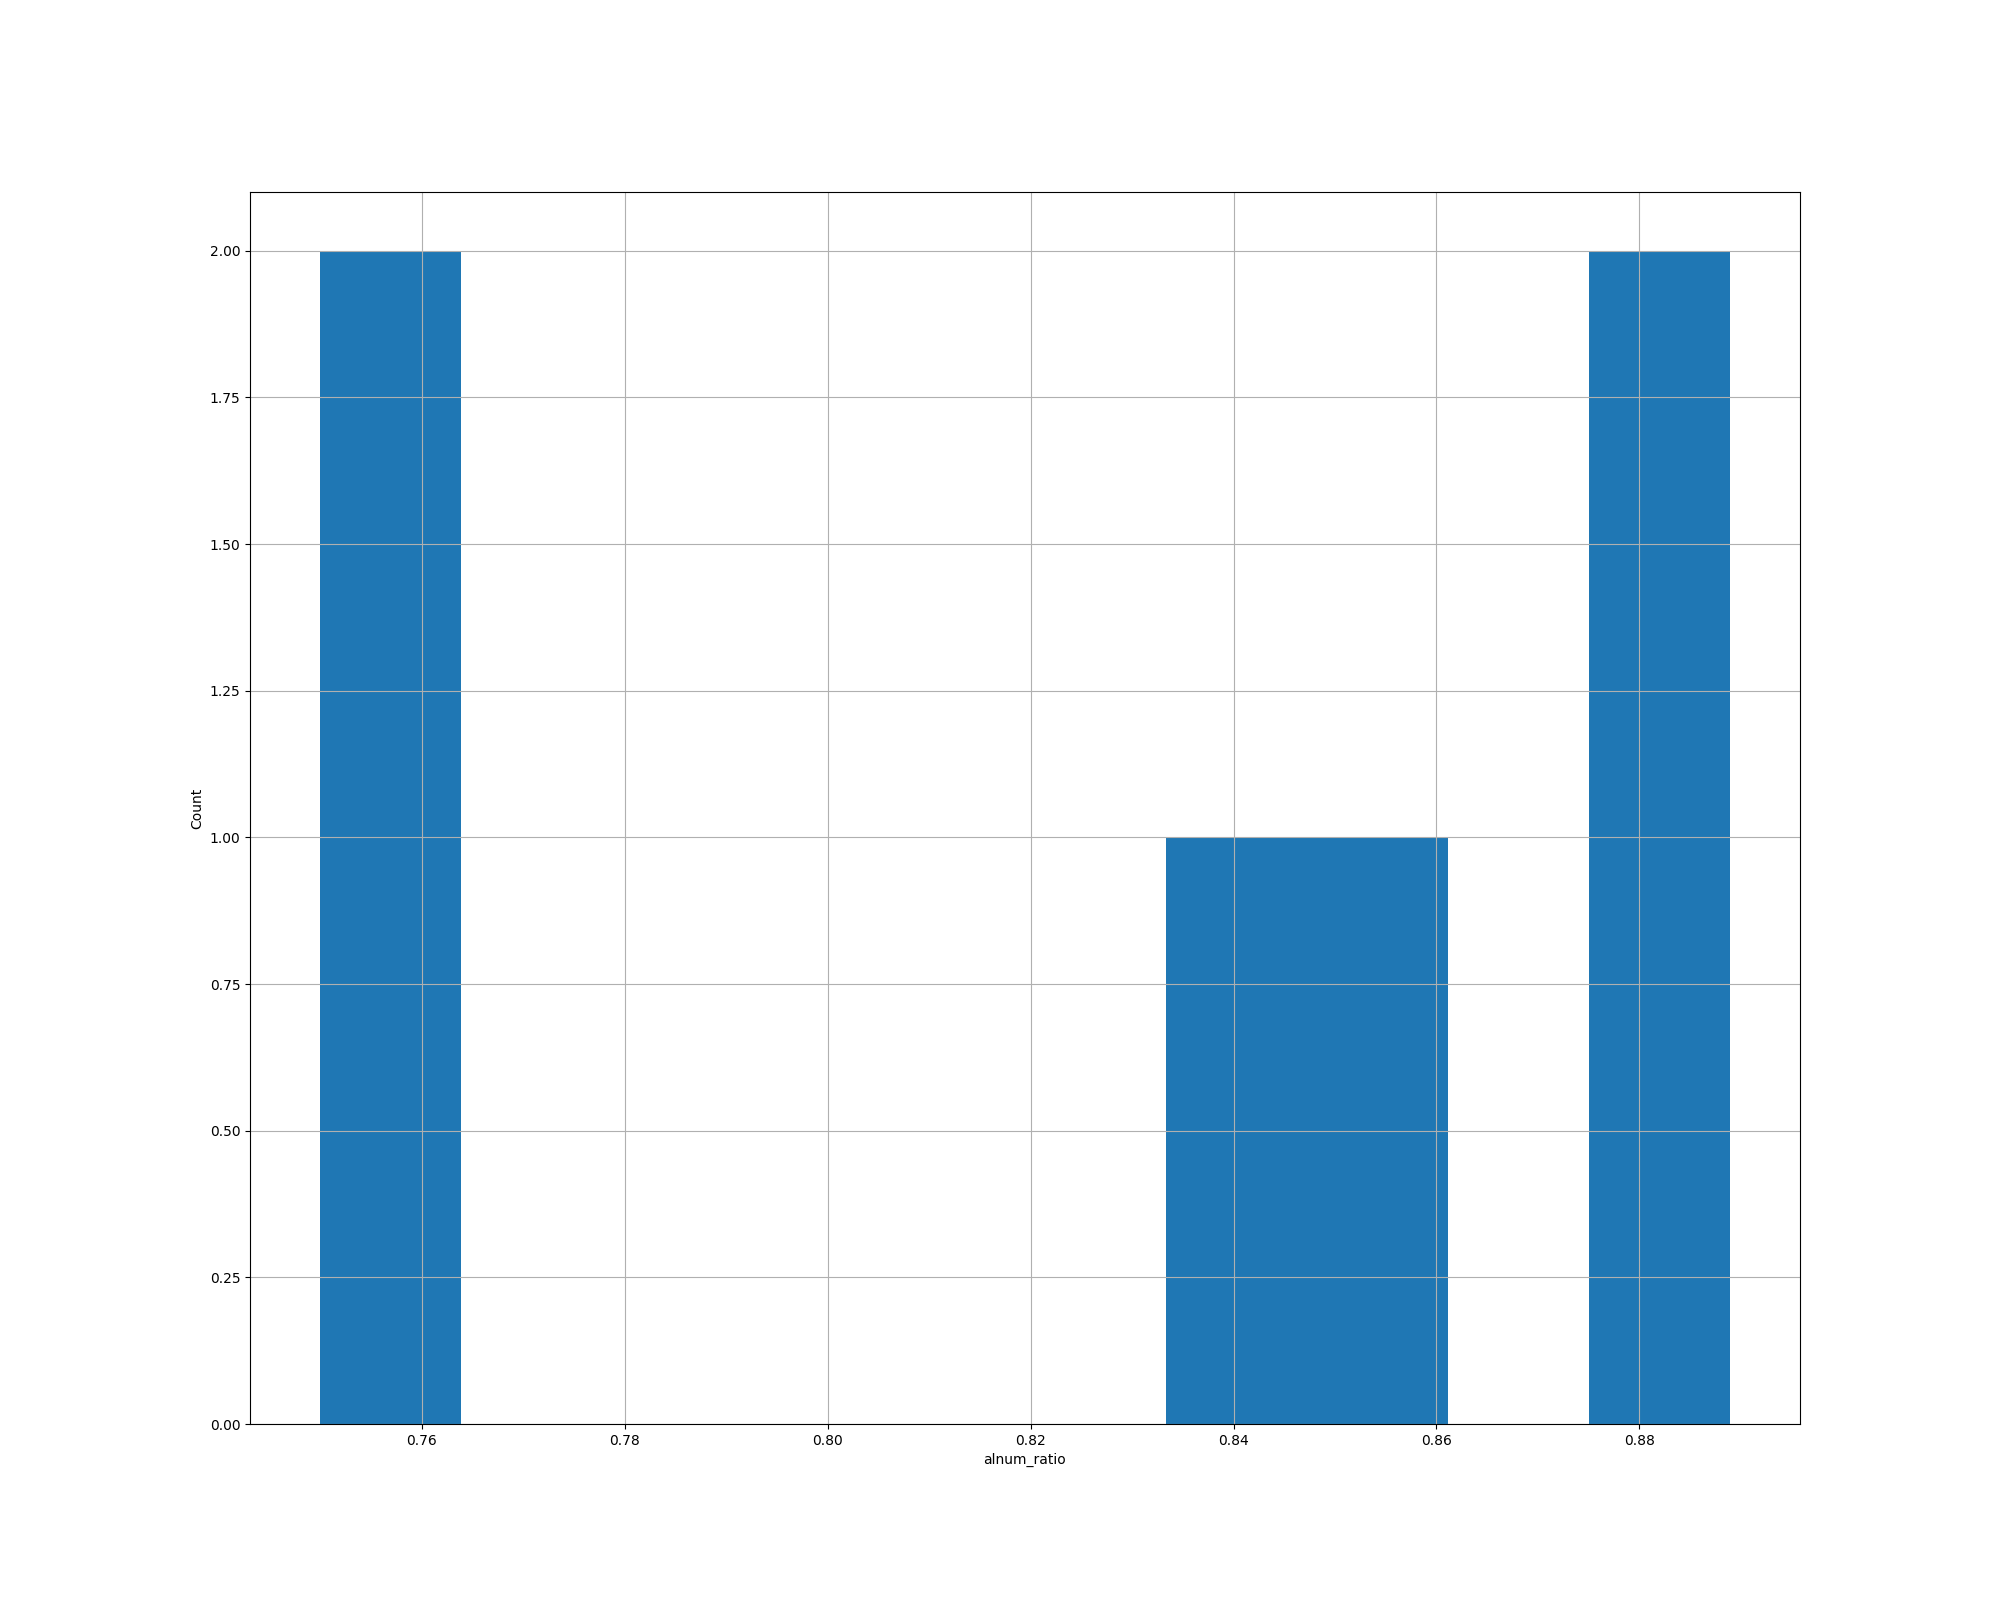

2024-09-25 05:43:44.709 | SAVE_LOG | agentscope.logging:_save_msg:96 - system: Processing data...
2024-09-25 05:43:44.710 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "ec1d13e109534379808a9e609ec8b866", "metadata": null, "url": null, "timestamp": "2024-09-25 05:43:44", "name": "system", "content": "Processing data...", "role": "system"}


system: Processing data...


2024-09-25 05:43:55.026 | SAVE_LOG | agentscope.logging:_save_msg:96 - assistant: The calculation of the ratio of alphabetic and numeric characters in your dataset is complete. You can find the processed data at this path: /root/Codes/data-juicer/outputs/20240925_054341/processed_data.jsonl.
2024-09-25 05:43:55.027 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "ff75cefe777a46829b204a8a300b2290", "metadata": null, "url": null, "timestamp": "2024-09-25 05:43:55", "name": "assistant", "content": "The calculation of the ratio of alphabetic and numeric characters in your dataset is complete. You can find the processed data at this path: /root/Codes/data-juicer/outputs/20240925_054341/processed_data.jsonl.", "role": "assistant"}


assistant: The calculation of the ratio of alphabetic and numeric characters in your dataset is complete. You can find the processed data at this path: /root/Codes/data-juicer/outputs/20240925_054341/processed_data.jsonl.


In [5]:
msg = Msg(
    name="user", 
    content=f"Calculate the ratio of alphabetic and numeric characters in the dataset. The dataset path: {dataset_path}", 
    role="user"
)
logger.chat(msg)

agent = create_agent()
response = agent(msg)

2024-09-25 05:43:58.318 | SAVE_LOG | agentscope.logging:_save_msg:96 - user: I only want the visually appealing images. The dataset path: demos/data/demo-dataset-images.jsonl
2024-09-25 05:43:58.319 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "23efb9b813484f2c86c5db2357176eff", "metadata": null, "url": null, "timestamp": "2024-09-25 05:43:58", "name": "user", "content": "I only want the visually appealing images. The dataset path: demos/data/demo-dataset-images.jsonl", "role": "user"}
2024-09-25 05:43:58.320 | INFO     | agentscope.models.model:__init__:203 - Initialize model by configuration [dashscope_chat-qwen-max]
2024-09-25 05:43:58.321 | WARNING  | agentscope.service.service_toolkit:add:213 - Service function `finish` already exists, skip adding it.


user: I only want the visually appealing images. The dataset path: demos/data/demo-dataset-images.jsonl


2024-09-25 05:44:06.407 | SAVE_LOG | agentscope.logging:_save_msg:96 - system: Analyzing data...
2024-09-25 05:44:06.408 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "65075b1a15ff496e951813f0eabd2802", "metadata": null, "url": null, "timestamp": "2024-09-25 05:44:06", "name": "system", "content": "Analyzing data...", "role": "system"}


system: Analyzing data...


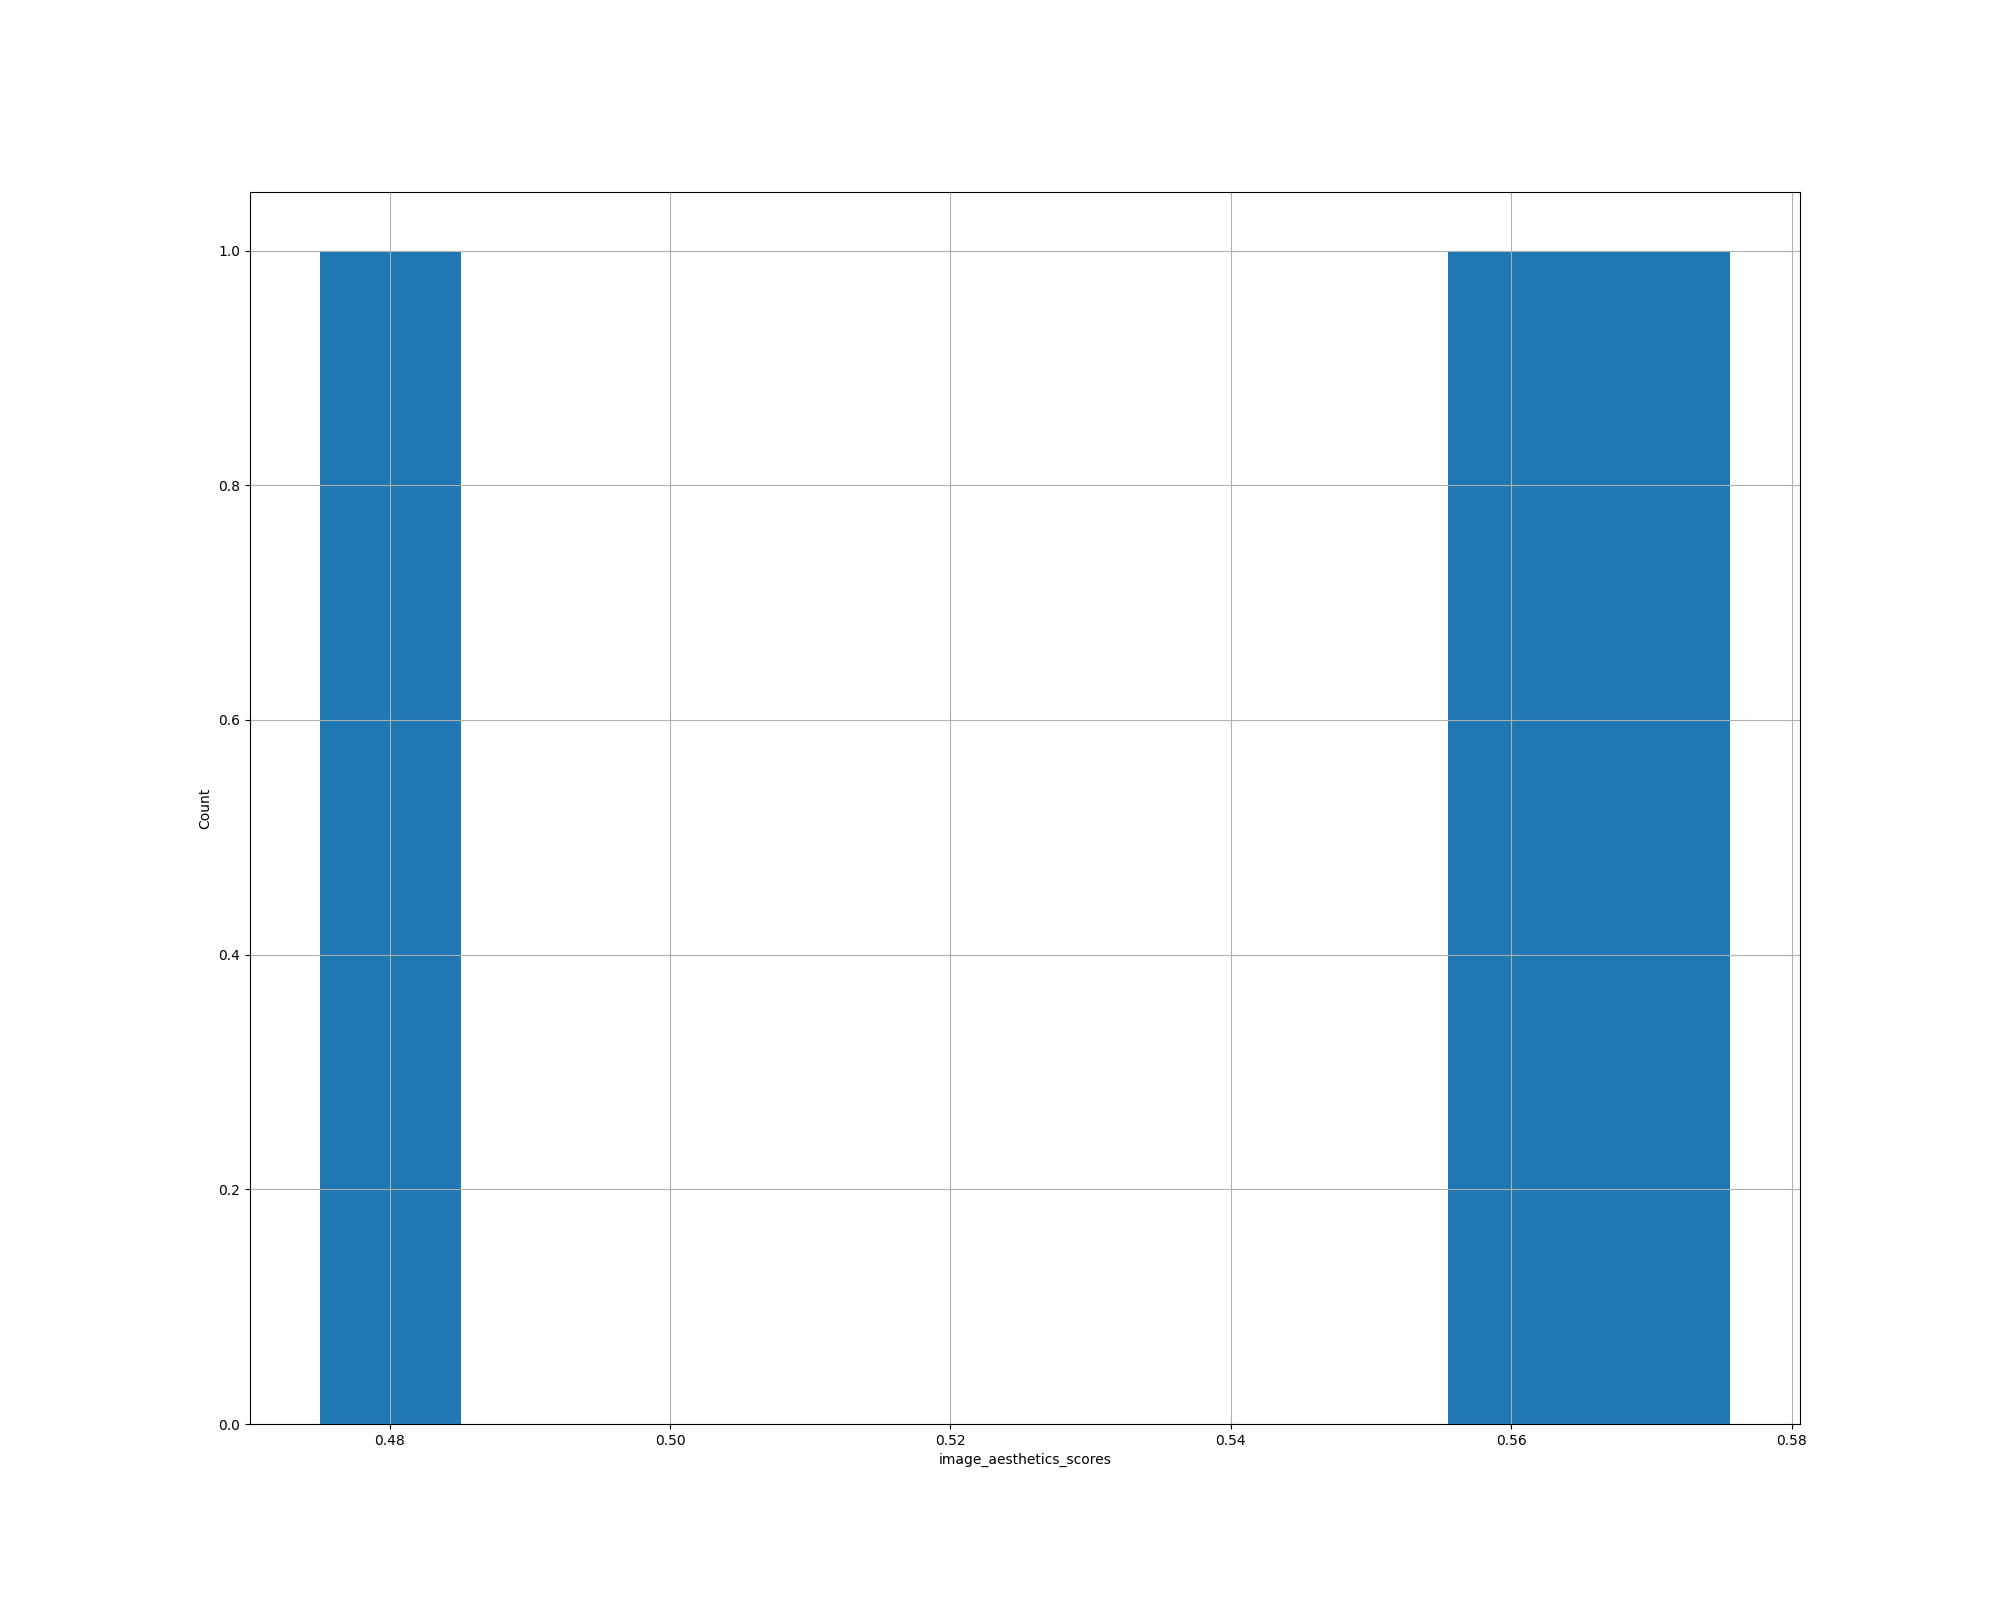

2024-09-25 05:44:17.888 | SAVE_LOG | agentscope.logging:_save_msg:96 - system: Processing data...
2024-09-25 05:44:17.888 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "6bc2ca70fd2240d8ad6f79e34df17833", "metadata": null, "url": null, "timestamp": "2024-09-25 05:44:17", "name": "system", "content": "Processing data...", "role": "system"}


system: Processing data...


2024-09-25 05:46:15.499 | SAVE_LOG | agentscope.logging:_save_msg:96 - assistant: Your request has been processed, and the visually appealing images have been filtered. You can find them at the following path: /root/Codes/data-juicer/outputs/20240925_054414/processed_data.jsonl
2024-09-25 05:46:15.500 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "1c73be0e6e7946a6a5e498c427906dd7", "metadata": null, "url": null, "timestamp": "2024-09-25 05:46:15", "name": "assistant", "content": "Your request has been processed, and the visually appealing images have been filtered. You can find them at the following path: /root/Codes/data-juicer/outputs/20240925_054414/processed_data.jsonl", "role": "assistant"}


assistant: Your request has been processed, and the visually appealing images have been filtered. You can find them at the following path: /root/Codes/data-juicer/outputs/20240925_054414/processed_data.jsonl


In [6]:
image_dataset_path = 'demos/data/demo-dataset-images.jsonl'
msg = Msg(
    name="user", 
    content=f"I only want the visually appealing images. The dataset path: {image_dataset_path}", 
    role="user"
)
logger.chat(msg)

agent = create_agent()
response = agent(msg)

2024-09-25 05:47:02.903 | SAVE_LOG | agentscope.logging:_save_msg:96 - user: Keep images with low NSFW score. The dataset path: demos/data/demo-dataset-images.jsonl
2024-09-25 05:47:02.904 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "52087132d3ba43d189e5a1bdaac468ba", "metadata": null, "url": null, "timestamp": "2024-09-25 05:47:02", "name": "user", "content": "Keep images with low NSFW score. The dataset path: demos/data/demo-dataset-images.jsonl", "role": "user"}
2024-09-25 05:47:02.904 | INFO     | agentscope.models.model:__init__:203 - Initialize model by configuration [dashscope_chat-qwen-max]
2024-09-25 05:47:02.905 | WARNING  | agentscope.service.service_toolkit:add:213 - Service function `finish` already exists, skip adding it.


user: Keep images with low NSFW score. The dataset path: demos/data/demo-dataset-images.jsonl


2024-09-25 05:47:12.471 | SAVE_LOG | agentscope.logging:_save_msg:96 - system: Analyzing data...
2024-09-25 05:47:12.472 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "9be86a1e6a9045e49dd0159ca91a0db1", "metadata": null, "url": null, "timestamp": "2024-09-25 05:47:12", "name": "system", "content": "Analyzing data...", "role": "system"}


system: Analyzing data...


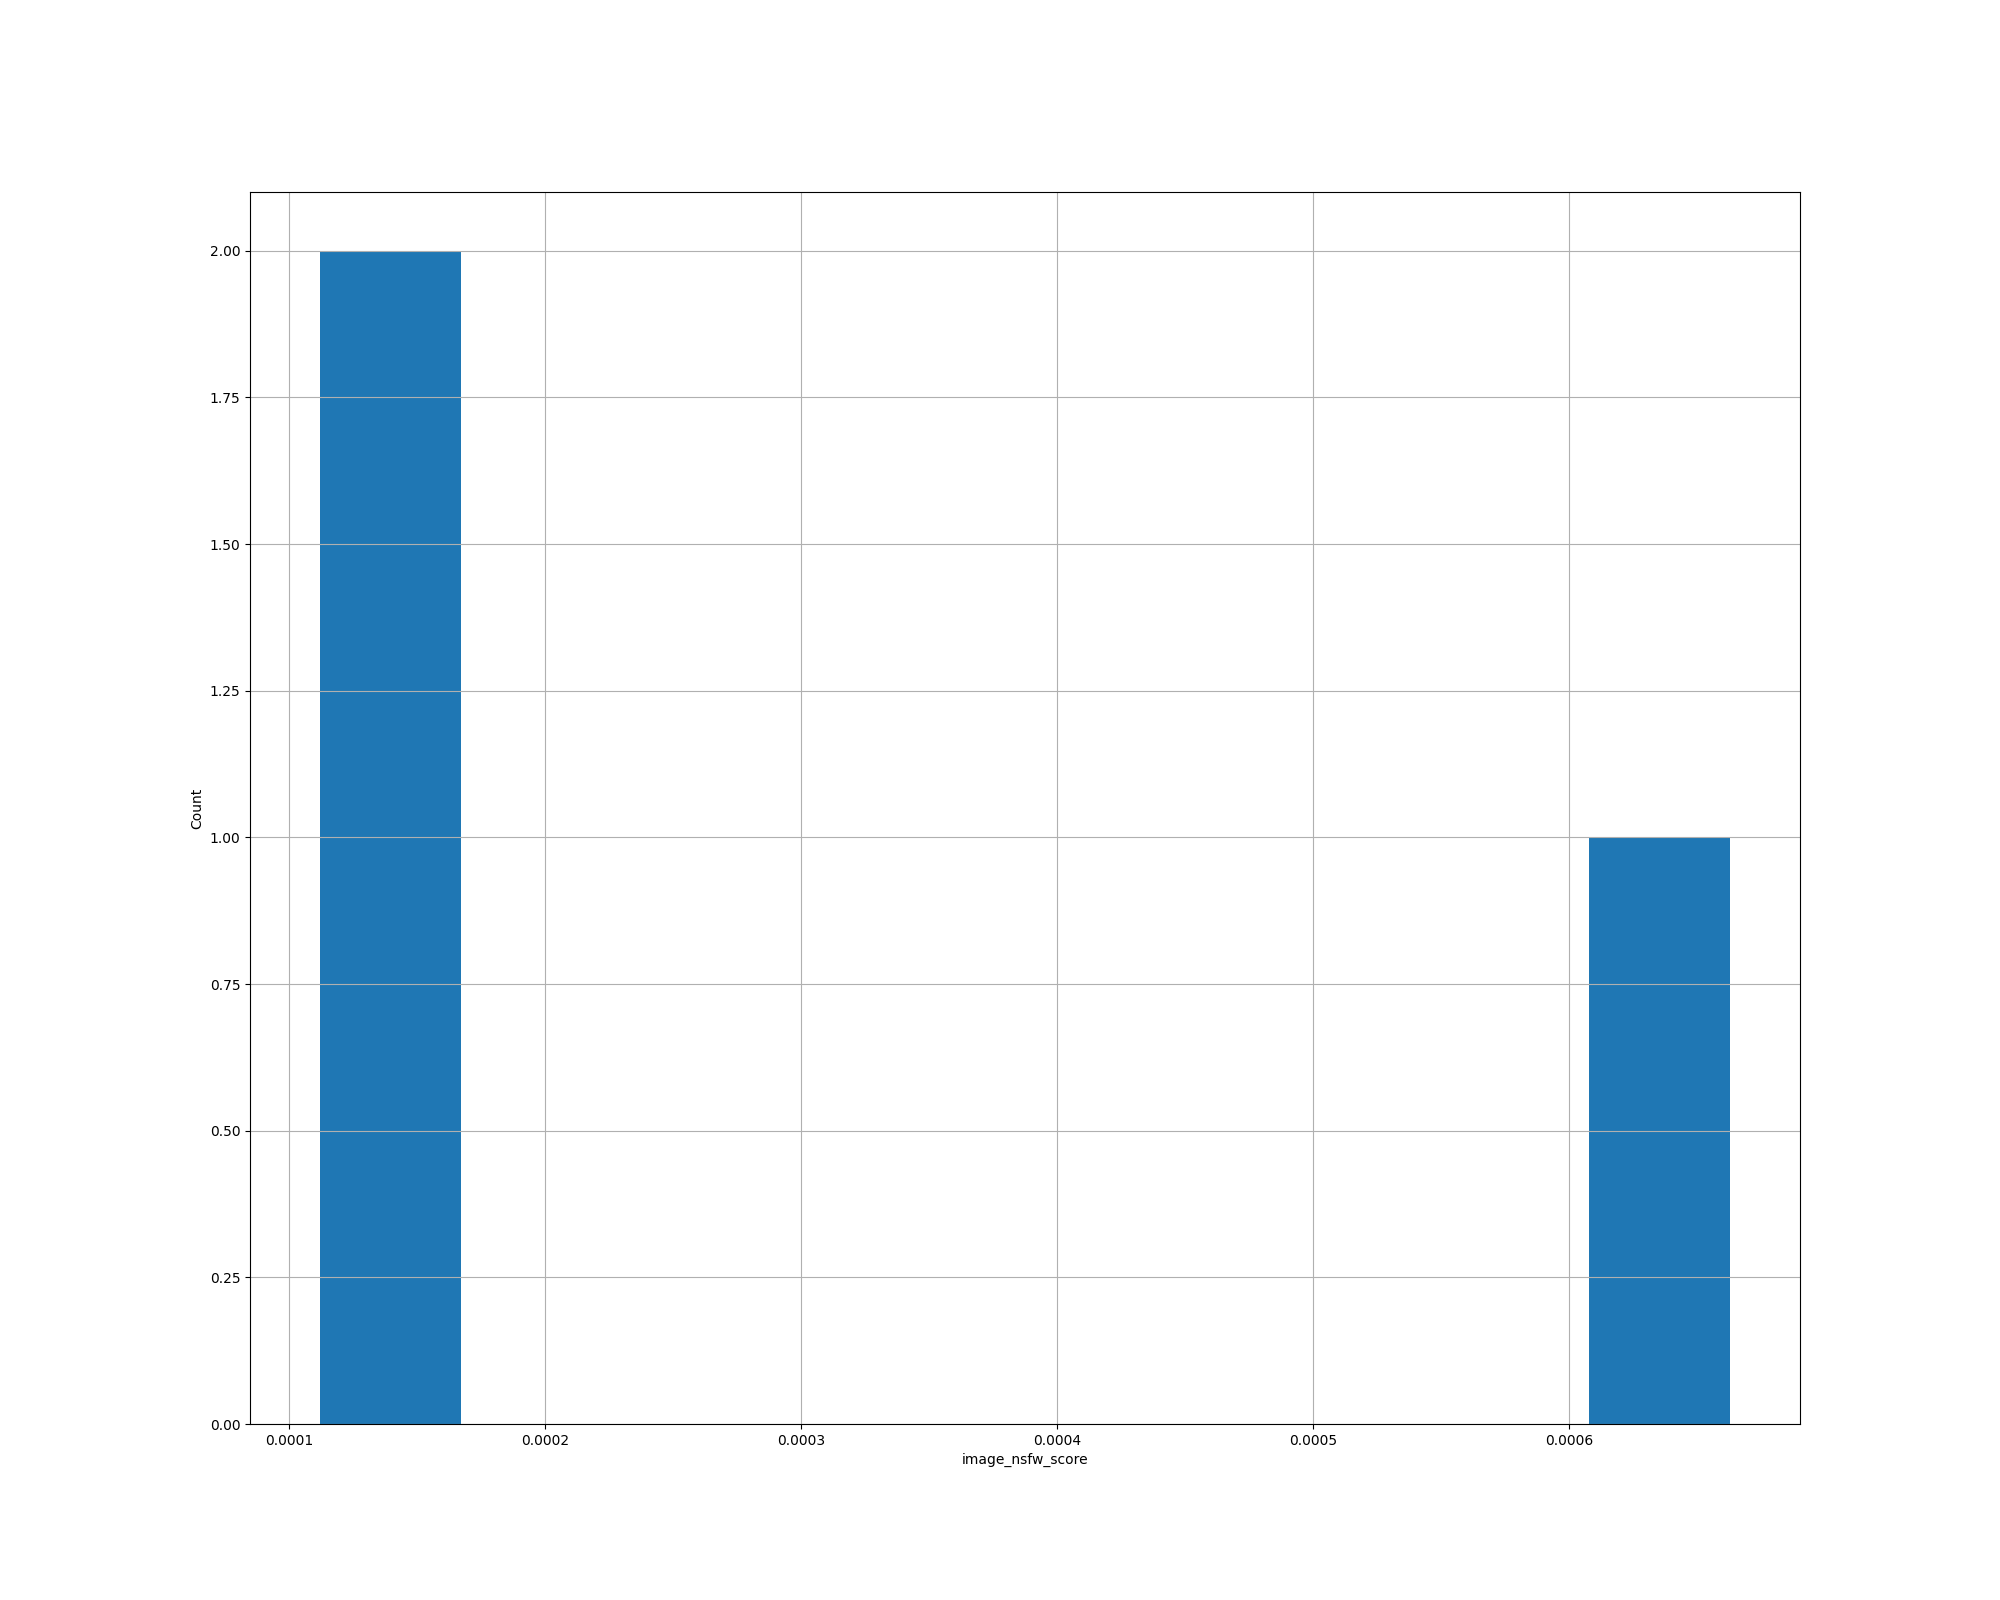

2024-09-25 05:49:31.003 | SAVE_LOG | agentscope.logging:_save_msg:96 - system: Processing data...
2024-09-25 05:49:31.004 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "a47bc1128b8c4889969d85363a908682", "metadata": null, "url": null, "timestamp": "2024-09-25 05:49:31", "name": "system", "content": "Processing data...", "role": "system"}


system: Processing data...


2024-09-25 05:51:14.716 | SAVE_LOG | agentscope.logging:_save_msg:96 - assistant: Your request has been processed. The images with low NSFW scores have been kept, and the filtered dataset is available at /root/Codes/data-juicer/outputs/20240925_054927/processed_data.jsonl.
2024-09-25 05:51:14.716 | SAVE_MSG | agentscope.logging:_save_msg:101 - {"__module__": "agentscope.message.msg", "__name__": "Msg", "id": "3b80e2757b1047a38539a7ff9d23b2a6", "metadata": null, "url": null, "timestamp": "2024-09-25 05:51:14", "name": "assistant", "content": "Your request has been processed. The images with low NSFW scores have been kept, and the filtered dataset is available at /root/Codes/data-juicer/outputs/20240925_054927/processed_data.jsonl.", "role": "assistant"}


assistant: Your request has been processed. The images with low NSFW scores have been kept, and the filtered dataset is available at /root/Codes/data-juicer/outputs/20240925_054927/processed_data.jsonl.


In [7]:
msg = Msg(
    name="user", 
    content=f"Keep images with low NSFW score. The dataset path: {image_dataset_path}", 
    role="user"
)
logger.chat(msg)

agent = create_agent()
response = agent(msg)